# Importing the Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


'''
Importing the necessary libraries
Pandas for importing the dataset, handling missing values, data manipulation and analysis
Numpy for numerical operations
Matplotlib and Seaborn for data visualization



 '''

'\nImporting the necessary libraries \nPandas for importing the dataset, handling missing values, data manipulation and analysis\nNumpy for numerical operations\nMatplotlib and Seaborn for data visualization\n\n\n\n '

# Importing the ScikitLearn Libraries for training and testing the desired Machine learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE


'''
the train_test_split library is used for spliting the data for into testing and training the model

LabelEncoder is used for encoding the categorical variables into numerical values, for example, male and female to 0 and 1

sklearn.linear_model.LogisticRegression is used for training the logistic regression model

sklearn.tree.DecisionTreeClassifier is used for training the decision tree model

sklearn.metrics.classification_report provides a comprehensive report of the model's performance, which is used for understanding how the model is performing




sklearn.metrics.confusion_matrix is used to evaluate the accuracy of the model and is used in binary classification problems

sklearn.metrics.f1_score is the  harmonic mean of the precision and recall

sklearn.metrics.precision_score is the ratio of true positives to the sum of true positives and false positives

'''

"\nthe train_test_split library is used for spliting the data for into testing and training the model \n\nLabelEncoder is used for encoding the categorical variables into numerical values, for example, male and female to 0 and 1\n\nsklearn.linear_model.LogisticRegression is used for training the logistic regression model\n\nsklearn.tree.DecisionTreeClassifier is used for training the decision tree model\n\nsklearn.metrics.classification_report provides a comprehensive report of the model's performance, which is used for understanding how the model is performing\n\n\n\n\nsklearn.metrics.confusion_matrix is used to evaluate the accuracy of the model and is used in binary classification problems\n\nsklearn.metrics.f1_score is the  harmonic mean of the precision and recall\n\nsklearn.metrics.precision_score is the ratio of true positives to the sum of true positives and false positives\n\n"

# Importing the DataSet

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/elevvo/Task 4/synthetic_loan_data.csv")

# Checking the Shape of Dataframe, Missing Value, and the Unique Values in Categorical Columns

In [ ]:
print('Shape:',df.shape) # checking the number of rows and columns in the dataframe
print('\nData Types:\n',df.dtypes) # Checking for the data types of the features we have in our dataframe
print('\nMissing Values:\n',df.isnull().sum()) # isnull function checks for the missing values in the dataset
print('\nUnique Values in Categorical Columns:\n')
for col in df.select_dtypes(include=['object']).columns: # checking the unique values
  print(f'{col}: {df[col].nunique()} unique values')

Shape: (9000, 14)

Data Types:
 CustomerID              object
Name                    object
Age                      int64
Gender                  object
MaritalStatus           object
EducationLevel          object
EmploymentStatus        object
AnnualIncome             int64
LoanAmountRequested      int64
PurposeOfLoan           object
CreditScore              int64
ExistingLoansCount       int64
LatePaymentsLastYear     int64
LoanApproved            object
dtype: object

Missing Values:
 CustomerID              0
Name                    0
Age                     0
Gender                  0
MaritalStatus           0
EducationLevel          0
EmploymentStatus        0
AnnualIncome            0
LoanAmountRequested     0
PurposeOfLoan           0
CreditScore             0
ExistingLoansCount      0
LatePaymentsLastYear    0
LoanApproved            0
dtype: int64

Unique Values in Categorical Columns:

CustomerID: 9000 unique values
Name: 8487 unique values
Gender: 2 unique values
Marit

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


# Preprocessing the Dataset

In [ ]:
'''
Analysing the key numerical features

This block of code perform EDA on three numerical features
1. Age of Applicants
2. Annual Income of Applicants
3. Loan Amount Requested by Applicants
'''

print('\nAge Analysis:')
print(df['Age'].describe())
print('\nValue Counts: \n',df['Age'].value_counts().head())
print('\nIncome Analysis:')
print(df['AnnualIncome'].describe())
print('\nValue Counts: \n',df['AnnualIncome'].value_counts().head())
print('\nLoanAmount Analysis:')
print(df['LoanAmountRequested'].describe())
print('\nValue Counts: \n',df['LoanAmountRequested'].value_counts().head())


Age Analysis:
count    9000.000000
mean       43.550444
std        14.909264
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64

Value Counts: 
 Age
62    203
64    199
34    198
43    197
66    196
Name: count, dtype: int64

Income Analysis:
count      9000.000000
mean     110279.808556
std       52147.330689
min       20009.000000
25%       65443.250000
50%      110331.000000
75%      155539.250000
max      199988.000000
Name: AnnualIncome, dtype: float64

Value Counts: 
 AnnualIncome
180083    3
197342    3
20785     3
85923     3
142494    3
Name: count, dtype: int64

LoanAmount Analysis:
count     9000.000000
mean     25680.583333
std      14116.494549
min       1000.000000
25%      13564.750000
50%      25814.000000
75%      37941.500000
max      49989.000000
Name: LoanAmountRequested, dtype: float64

Value Counts: 
 LoanAmountRequested
34489    4
25107    4
25491    4
48777    4
28562    3
Name: cou

# Visualizing the Features in the dataset for insights

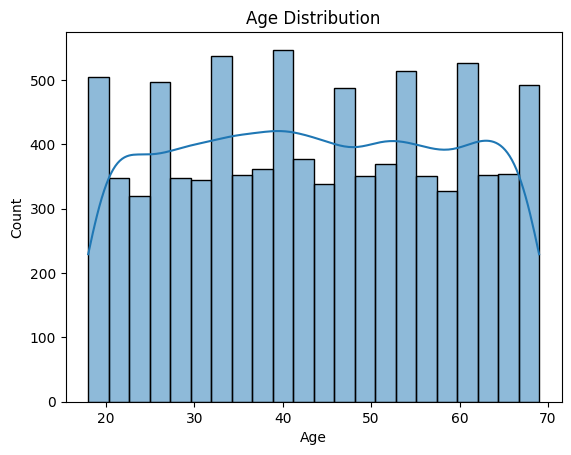

/tmp/ipython-input-3953502073.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette='pastel')


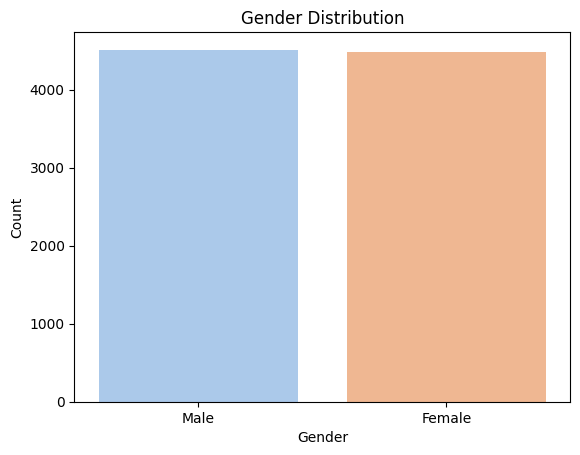

In [ ]:
'''
Visualing the dataset so that we can understand the trend in the dataset and the distribution of the features

Here we have done count of Age and gender of the applicants
'''

sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.countplot(x='Gender',data=df,palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-70139757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MaritalStatus',data=df,palette='tab10')


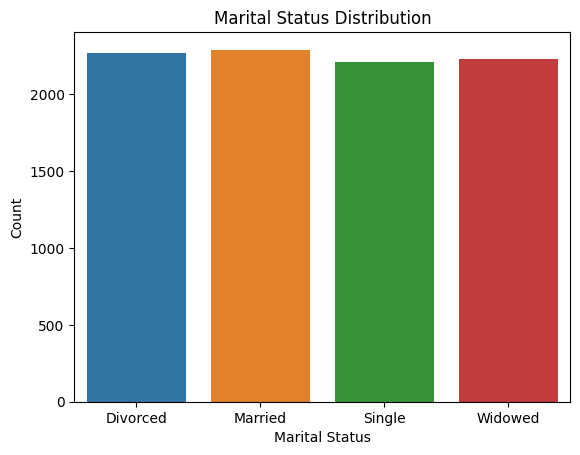

/tmp/ipython-input-70139757.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EducationLevel',data=df,palette='coolwarm')


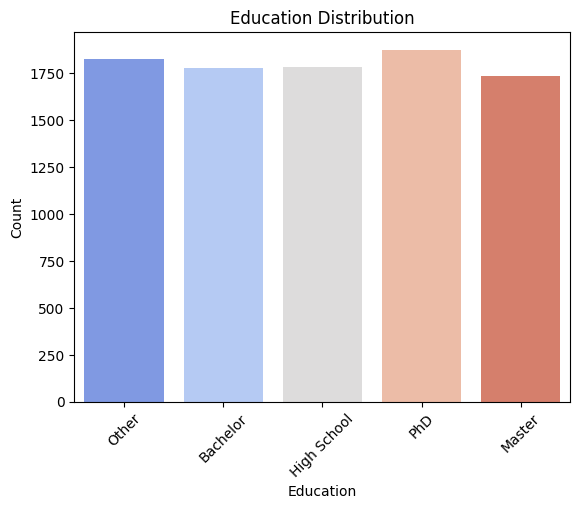

In [ ]:
# This is the visualization of the marital status and Education distribution.
# Using the Count Plot we can have the count of the applicants in each category





sns.countplot(x='MaritalStatus',data=df,palette='tab10')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

sns.countplot(x='EducationLevel',data=df,palette='coolwarm')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3577440524.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EmploymentStatus',data=df,palette='viridis')


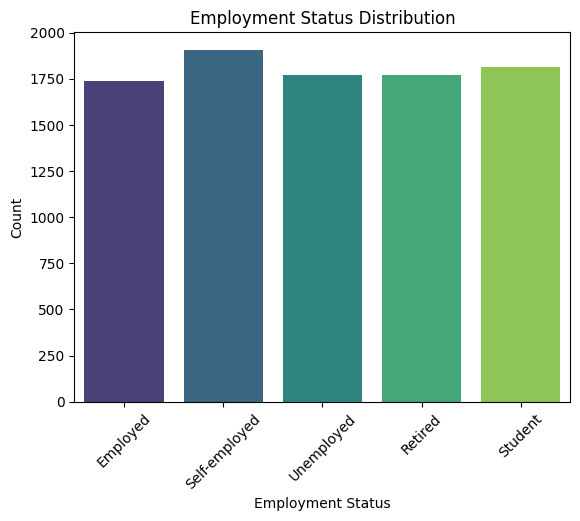

/tmp/ipython-input-3577440524.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['AnnualIncome'],palette='Set2')


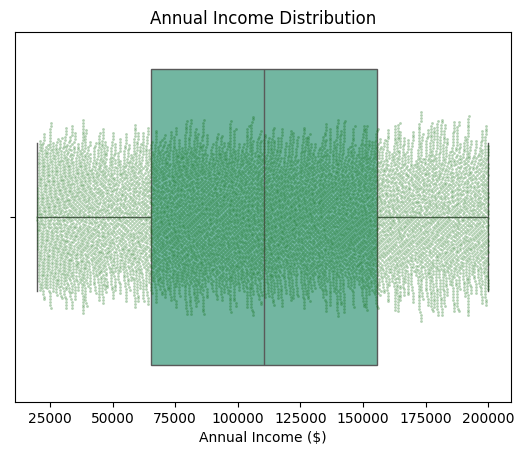

In [ ]:
# Creating a countplot to show the frequency distribution of employement status categories

sns.countplot(x='EmploymentStatus',data=df,palette='viridis')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Creating a countplot to show the income distribution statistics
# swarmplot to show the individual data points


sns.boxplot(x=df['AnnualIncome'],palette='Set2')
sns.swarmplot(x=df['AnnualIncome'],color='darkgreen',size=2,alpha=0.3)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.show()

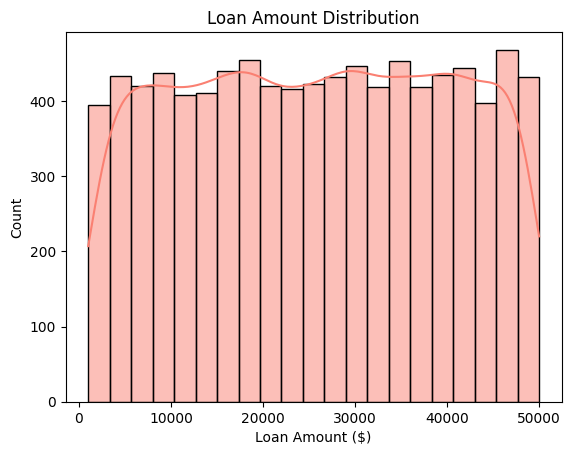

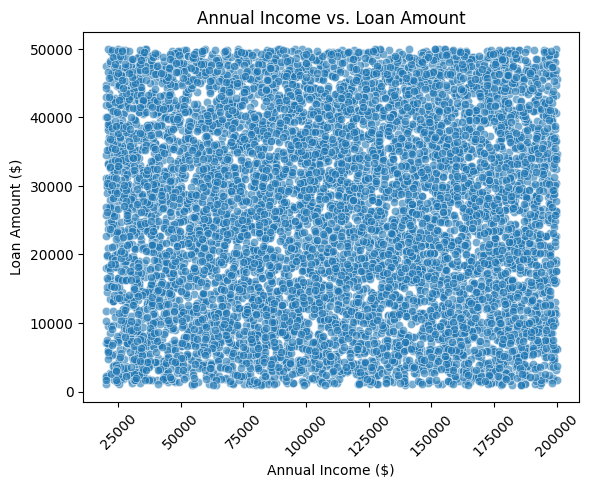

In [ ]:
# Creating a Histogram to visualize the distribution of loan amount

sns.histplot(df['LoanAmountRequested'],kde=True,color='salmon')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.show()

# Creating a scatter plot to examine relationship between loan amount and income

sns.scatterplot(x='AnnualIncome',y='LoanAmountRequested',data=df,alpha=0.6)
plt.title('Annual Income vs. Loan Amount')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1005370714.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['PurposeOfLoan'],palette='dark')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Personal'),
  Text(1, 0, 'Home'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Car'),
  Text(4, 0, 'Business')])

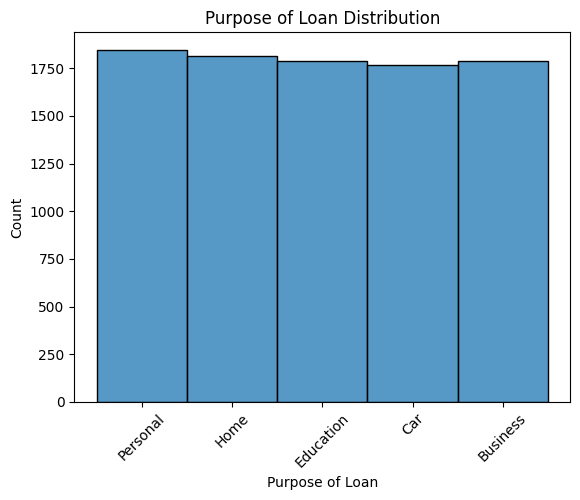

In [ ]:
# Creating a histplot to visualize the distribution of purpose of loan and using count

sns.histplot(df['PurposeOfLoan'],palette='dark')
plt.title('Purpose of Loan Distribution')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)



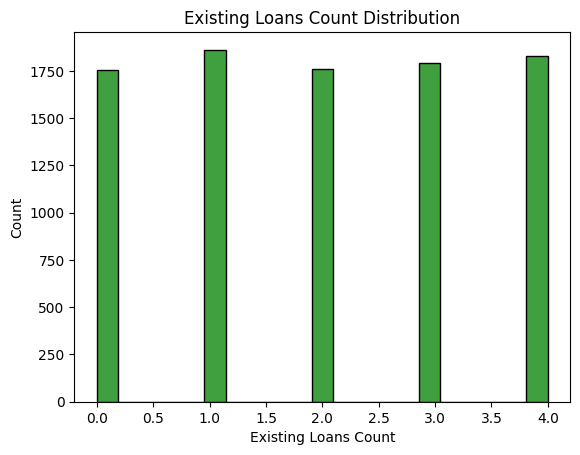

In [ ]:
# Creating a Histogram to visualize the distribution of existing loans

sns.histplot(df['ExistingLoansCount'],color='green')
plt.title('Existing Loans Count Distribution')
plt.xlabel('Existing Loans Count')
plt.ylabel('Count')
plt.show()

# Encoding of the Categorical Values

In [ ]:
df['LoanApproved'] = le.fit_transform(df['LoanApproved'])

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,1,Divorced,Other,Employed,97622,46413,Personal,500,2,4,1
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,1,Married,Bachelor,Employed,96925,24065,Home,532,2,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,0,Single,High School,Self-employed,167927,46676,Personal,795,2,6,1
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,0,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,0,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,0


In [ ]:
df['EducationLevel'].unique()

array(['Other', 'Bachelor', 'High School', 'PhD', 'Master'], dtype=object)

In [ ]:
edu_order = {'High School':1, 'Bachelor':2, 'Master':3,'PhD':4,'Other':5}
df['EducationLevel'] = df['EducationLevel'].map(edu_order)

In [ ]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-employed', 'Unemployed', 'Retired', 'Student'],
      dtype=object)

In [ ]:
emp_order = {'Unemployed':0, 'Employed':1,'Self-employed':2, 'Student':3, 'Retired':4}
df['EmploymentStatus'] = df['EmploymentStatus'].map(emp_order)

In [ ]:
df['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single', 'Widowed'], dtype=object)

In [ ]:
mrt_status = {'Single':0, 'Married':1, 'Divorced':2,'Widowed':3}
df['MaritalStatus'] = df['MaritalStatus'].map(mrt_status)

In [ ]:
df['PurposeOfLoan'].unique()

array(['Personal', 'Home', 'Education', 'Car', 'Business'], dtype=object)

In [ ]:
ln_prp = {'Personal':0, 'Home':1, 'Education':2,'Car':3,'Business':4}
df['PurposeOfLoan'] = df['PurposeOfLoan'].map(ln_prp)

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,1,2,5,1,97622,46413,0,500,2,4,1
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,1,1,2,1,96925,24065,1,532,2,0,1
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,0,0,1,2,167927,46676,0,795,2,6,1
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,0,3,4,0,112920,27406,2,376,2,9,0
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,0,3,3,0,152183,49337,3,517,3,7,0


# Training the Models and Checking for the Accuracy with different Metrics

In [ ]:
# Droping the Columns CustomerID and Name which are not required for training the model

X = df.drop(['LoanApproved','CustomerID','Name'],axis=1)
y = df['LoanApproved'] # creating a variable for storing the output of the  input features

In [ ]:
# Splitting the dataset in 80/20 ratio for training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(max_iter=1000,random_state=42).fit(X_train_scaled,y_train)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test,lr.predict(X_test_scaled))}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test,dt.predict(X_test))}")

Logistic Regression Accuracy: 0.7005555555555556
Decision Tree Accuracy: 0.5722222222222222


In [ ]:
# Creating a function which provides a complete, standardized evaluations for comparing different models performance on binary classification.

from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{'='*50}")
    print(f"{model_name} Performance")
    print('='*50)

    # Key metrics
    print(classification_report(y_true, y_pred))

    # Confusion matrix visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_true, y_pred),annot=True, fmt='d', cmap='Blues',xticklabels=['Rejected','Approved'],yticklabels=['Rejected','Approved'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Return metrics as dictionary
    return {
        'Model': model_name,
        'F1-Score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred)
    }


Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       539
           1       0.70      1.00      0.82      1261

    accuracy                           0.70      1800
   macro avg       0.35      0.50      0.41      1800
weighted avg       0.49      0.70      0.58      1800



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


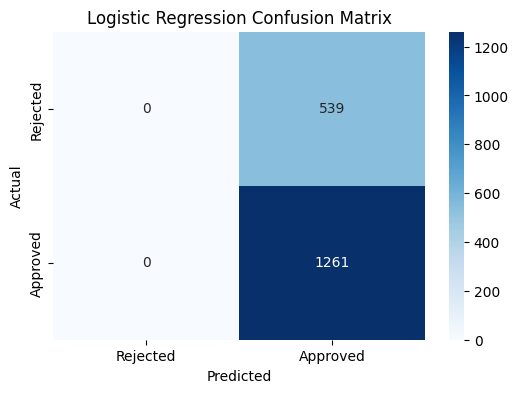

In [ ]:
lr_preds = lr.predict(X_test_scaled)
lr_metrics = evaluate_model(y_test, lr_preds, "Logistic Regression")


Decision Tree Performance
              precision    recall  f1-score   support

           0       0.30      0.31      0.31       539
           1       0.70      0.68      0.69      1261

    accuracy                           0.57      1800
   macro avg       0.50      0.50      0.50      1800
weighted avg       0.58      0.57      0.58      1800



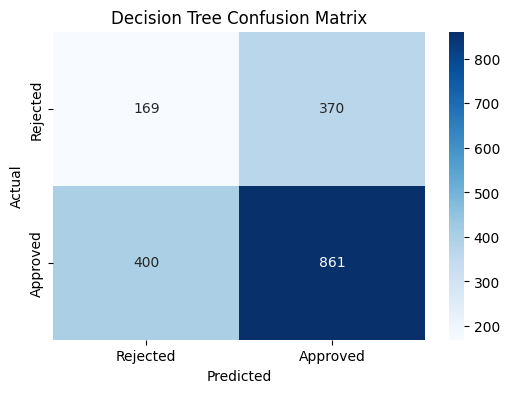

In [ ]:
dt_preds = dt.predict(X_test)
dt_metrics = evaluate_model(y_test, dt_preds, "Decision Tree")


Model Comparison:
                 Model  F1-Score  Precision    Recall  Accuracy
0  Logistic Regression  0.823914   0.700556  1.000000  0.700556
1        Decision Tree  0.691011   0.699431  0.682791  0.572222


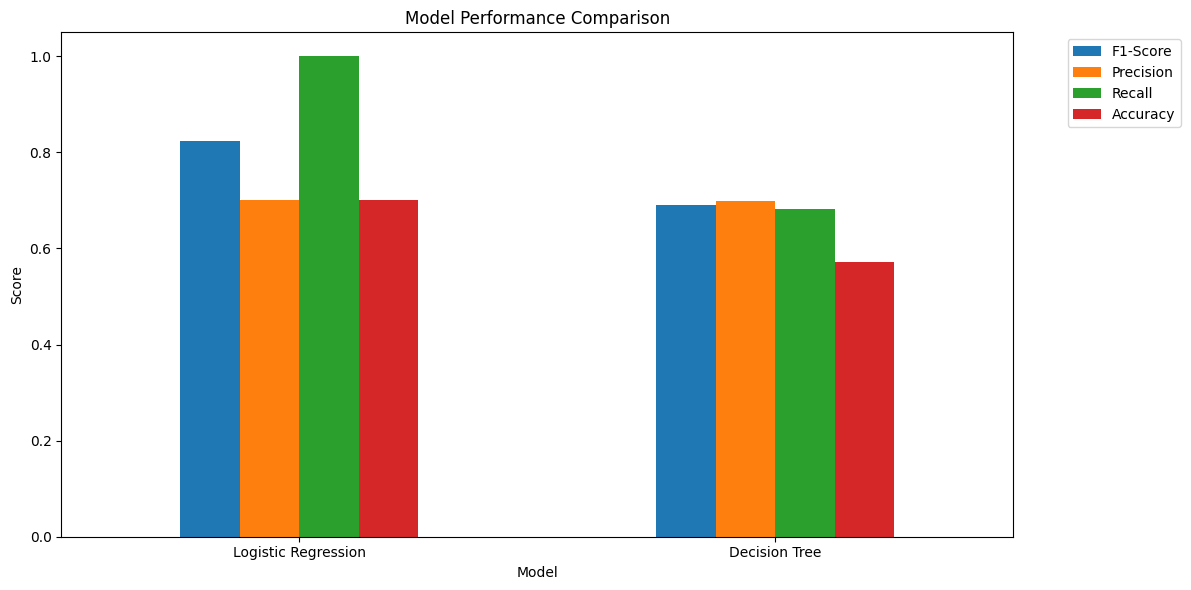

In [ ]:
# Created a comparison table for logistic Regression and Decision Tree
results_df = pd.DataFrame([lr_metrics, dt_metrics])
print("\nModel Comparison:")
print(results_df)

# Visual comparison of the metrics
metrics = ['F1-Score', 'Precision', 'Recall', 'Accuracy']
results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(12,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

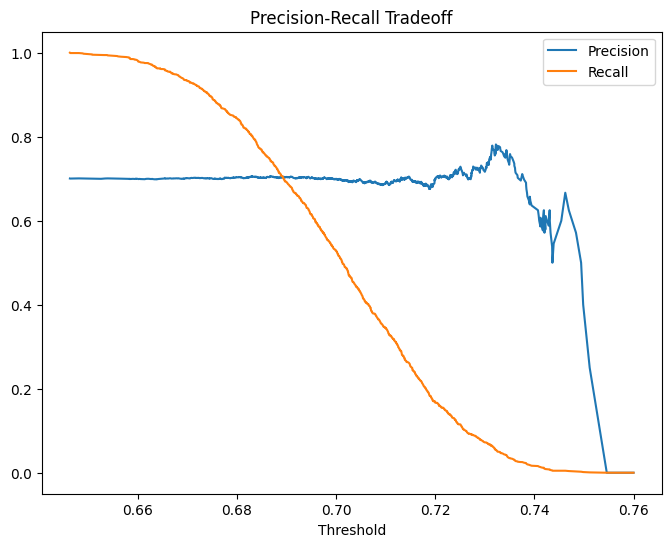

In [ ]:
# This code block extracts the model's predicted probabilities (0-1) for the positive class
# Thresholds --> Decision Boundaries from 0 to 1
# precision --> how many predicted approvals were correct at each threshold
# recall --> what percentage of actual approvals were captured at each threshold


from sklearn.metrics import precision_recall_curve

lr_probs = lr.predict_proba(X_test_scaled)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)


plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.show()

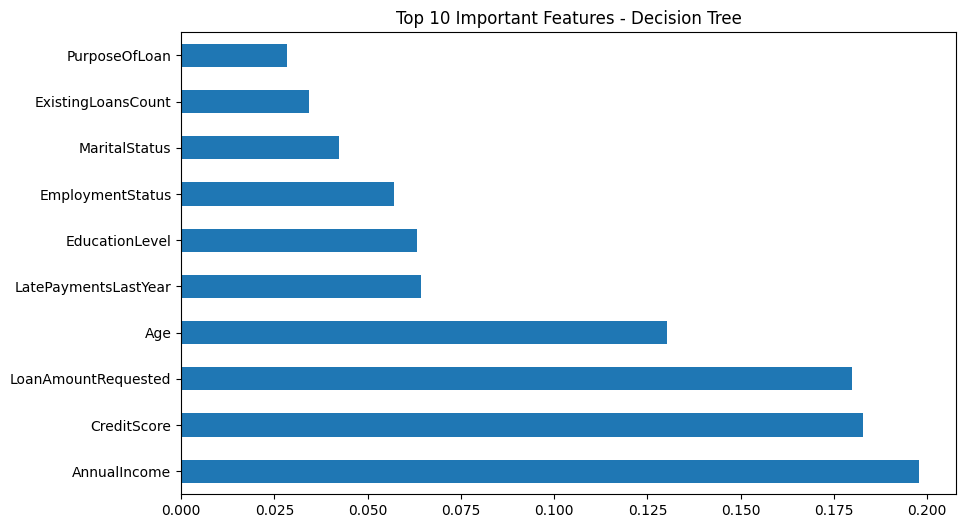

In [ ]:
# checking out the top 10 features for the decision tree

plt.figure(figsize=(10,6))
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.show()

# Using SMOTE and other Alternatives to address class Imbalance

In [ ]:
# These are the libraries for handling class imbalance, and used when we have unequal class distribution in the dataset.

# SMOTE Generate Synthetic samples for the minority Class by finding k-nearest neighbour

#ADASYN Generates more synthetic data where misclassification risk is high

# RandomUnderSampler is used when minority Class has sufficient samples but has a risk of losing important majority class information

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [ ]:

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

Before SMOTE: LoanApproved
1    5042
0    2158
Name: count, dtype: int64
After SMOTE: LoanApproved
1    5042
0    5042
Name: count, dtype: int64


Logistic Regression with SMOTE:

LR+SMOTE Performance
              precision    recall  f1-score   support

           0       0.30      0.48      0.37       539
           1       0.70      0.52      0.60      1261

    accuracy                           0.51      1800
   macro avg       0.50      0.50      0.49      1800
weighted avg       0.58      0.51      0.53      1800



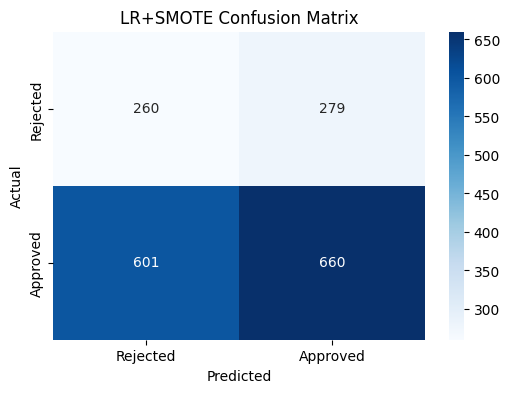


Decision Tree with SMOTE:

DT+SMOTE Performance
              precision    recall  f1-score   support

           0       0.33      0.35      0.34       539
           1       0.71      0.69      0.70      1261

    accuracy                           0.59      1800
   macro avg       0.52      0.52      0.52      1800
weighted avg       0.60      0.59      0.59      1800



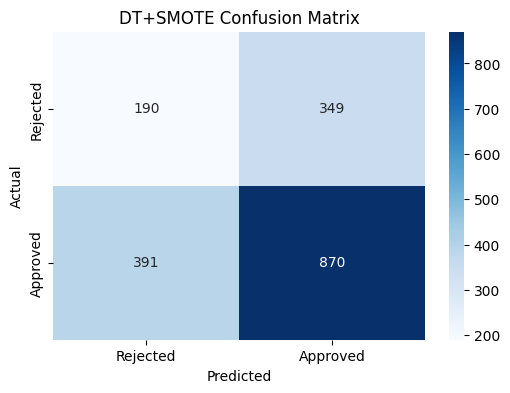

{'Model': 'DT+SMOTE',
 'F1-Score': 0.7016129032258065,
 'Precision': 0.7136997538966365,
 'Recall': 0.689928628072958,
 'Accuracy': 0.5888888888888889}

In [ ]:
# Training the models with SMOTE Resampled Data

lr_smote = LogisticRegression(max_iter=1000,random_state=42).fit(X_train_smote, y_train_smote)

dt_smote = DecisionTreeClassifier(random_state=42).fit(X_train_smote, y_train_smote)

print("Logistic Regression with SMOTE:")
evaluate_model(y_test, lr_smote.predict(X_test), "LR+SMOTE")

print("\nDecision Tree with SMOTE:")
evaluate_model(y_test, dt_smote.predict(X_test), "DT+SMOTE")

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [ ]:
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_train_combined, y_train_combined = smote_enn.fit_resample(X_train, y_train)


LR_Original Performance
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       539
           1       0.70      1.00      0.82      1261

    accuracy                           0.70      1800
   macro avg       0.35      0.50      0.41      1800
weighted avg       0.49      0.70      0.58      1800



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


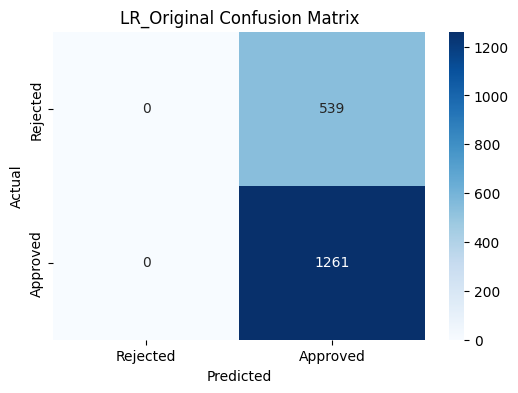


DT_Original Performance
              precision    recall  f1-score   support

           0       0.29      0.31      0.30       539
           1       0.70      0.68      0.69      1261

    accuracy                           0.57      1800
   macro avg       0.50      0.50      0.50      1800
weighted avg       0.58      0.57      0.57      1800



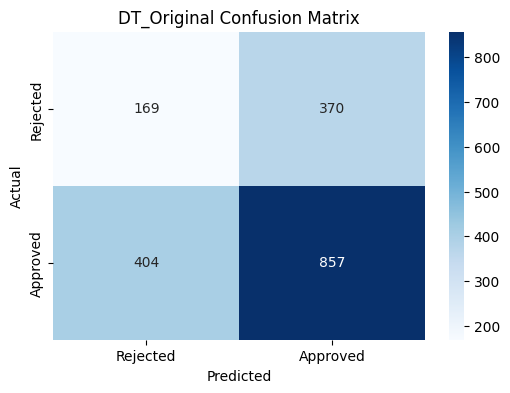


LR_SMOTE Performance
              precision    recall  f1-score   support

           0       0.30      0.48      0.37       539
           1       0.70      0.52      0.60      1261

    accuracy                           0.51      1800
   macro avg       0.50      0.50      0.49      1800
weighted avg       0.58      0.51      0.53      1800



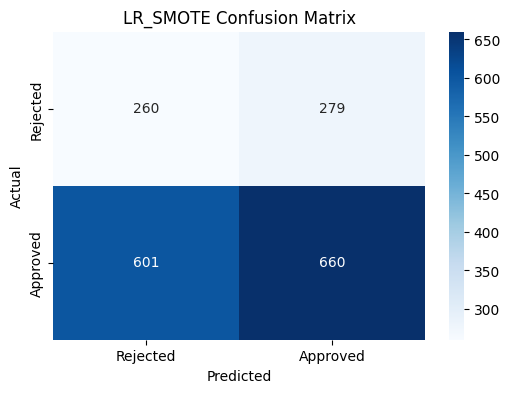


DT_SMOTE Performance
              precision    recall  f1-score   support

           0       0.32      0.35      0.33       539
           1       0.71      0.67      0.69      1261

    accuracy                           0.58      1800
   macro avg       0.51      0.51      0.51      1800
weighted avg       0.59      0.58      0.58      1800



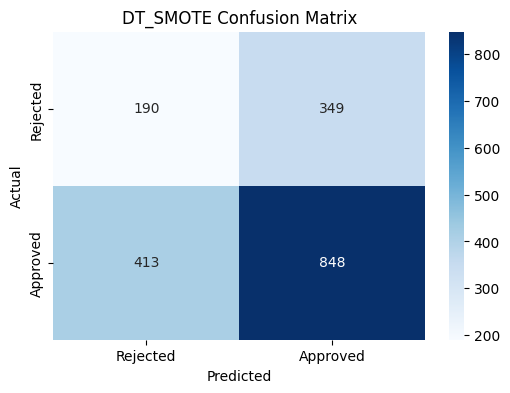


LR_ADASYN Performance
              precision    recall  f1-score   support

           0       0.30      0.70      0.42       539
           1       0.69      0.29      0.41      1261

    accuracy                           0.41      1800
   macro avg       0.50      0.50      0.41      1800
weighted avg       0.58      0.41      0.41      1800



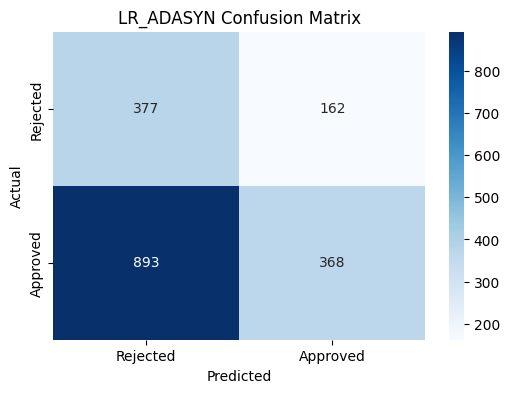


DT_ADASYN Performance
              precision    recall  f1-score   support

           0       0.32      0.35      0.33       539
           1       0.71      0.69      0.70      1261

    accuracy                           0.59      1800
   macro avg       0.52      0.52      0.52      1800
weighted avg       0.59      0.59      0.59      1800



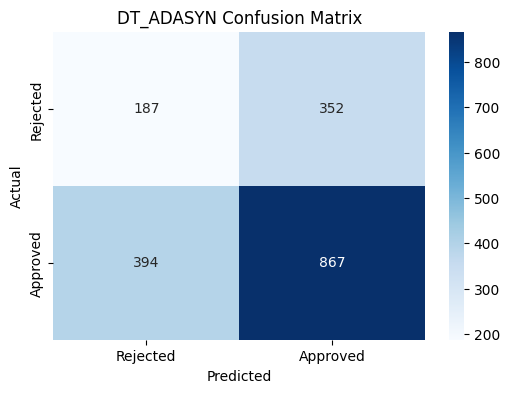


LR_UnderSample Performance
              precision    recall  f1-score   support

           0       0.29      0.47      0.36       539
           1       0.69      0.51      0.58      1261

    accuracy                           0.50      1800
   macro avg       0.49      0.49      0.47      1800
weighted avg       0.57      0.50      0.52      1800



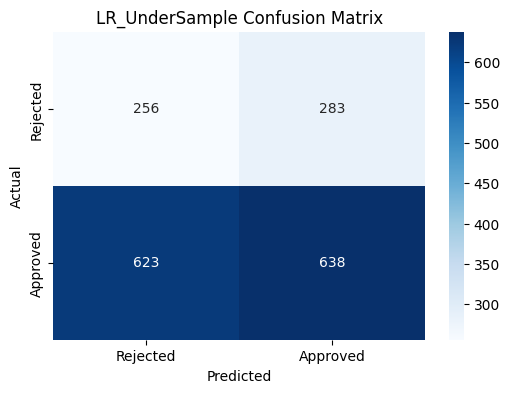


DT_UnderSample Performance
              precision    recall  f1-score   support

           0       0.31      0.52      0.38       539
           1       0.71      0.49      0.58      1261

    accuracy                           0.50      1800
   macro avg       0.51      0.51      0.48      1800
weighted avg       0.59      0.50      0.52      1800



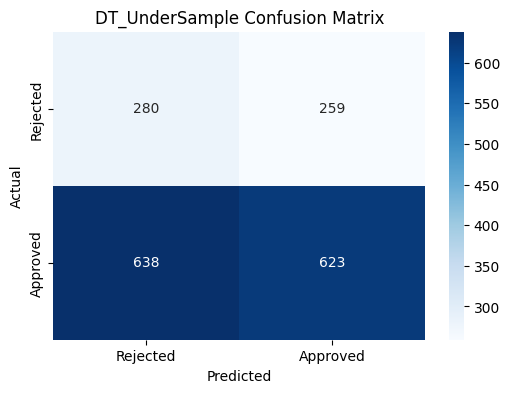


LR_SMOTEENN Performance
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       539
           1       0.00      0.00      0.00      1261

    accuracy                           0.30      1800
   macro avg       0.15      0.50      0.23      1800
weighted avg       0.09      0.30      0.14      1800



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


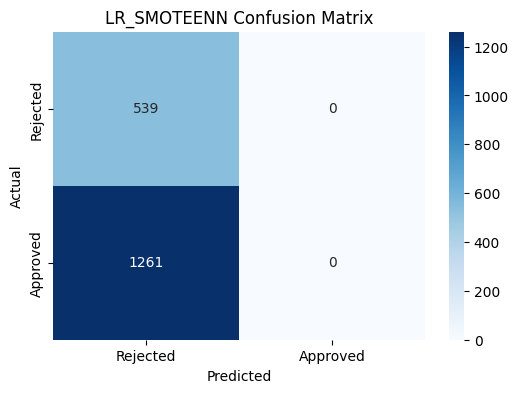


DT_SMOTEENN Performance


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.30      0.45      0.36       539
           1       0.70      0.56      0.62      1261

    accuracy                           0.53      1800
   macro avg       0.50      0.50      0.49      1800
weighted avg       0.58      0.53      0.55      1800



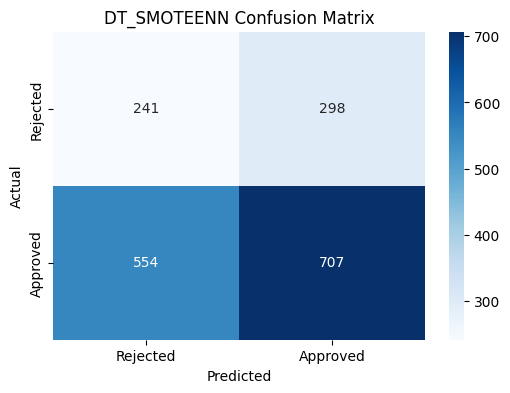

            Model  F1-Score  Precision    Recall  Accuracy
0     LR_Original  0.823914   0.700556  1.000000  0.700556
5       DT_ADASYN  0.699194   0.711239  0.687550  0.585556
3        DT_SMOTE  0.689992   0.708438  0.672482  0.576667
1     DT_Original  0.688907   0.698452  0.679619  0.570000
9     DT_SMOTEENN  0.624007   0.703483  0.560666  0.526667
2        LR_SMOTE  0.600000   0.702875  0.523394  0.511111
6  LR_UnderSample  0.584785   0.692725  0.505948  0.496667
7  DT_UnderSample  0.581428   0.706349  0.494052  0.501667
4       LR_ADASYN  0.410944   0.694340  0.291832  0.413889
8     LR_SMOTEENN  0.000000   0.000000  0.000000  0.299444


In [ ]:
# We have made a dictionary where we are comparing different class imbalance techniques by training and evaluating models on each version of the training data.

techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'UnderSample': (X_train_under, y_train_under),
    'SMOTEENN': (X_train_combined, y_train_combined)
}


results = []
for name, (X_tr, y_tr) in techniques.items():
    if name == 'Class Weight':
        lr = LogisticRegression(class_weight='balanced', max_iter=1000,random_state=42).fit(X_tr, y_tr)
        # increase the max_iter for a better convergence

        dt = DecisionTreeClassifier(class_weight='balanced').fit(X_tr, y_tr)

    else:
        lr = LogisticRegression(max_iter=1000,random_state=42).fit(X_tr, y_tr)
        dt = DecisionTreeClassifier().fit(X_tr, y_tr)

    lr_metrics = evaluate_model(y_test, lr.predict(X_test), f"LR_{name}")
    dt_metrics = evaluate_model(y_test, dt.predict(X_test), f"DT_{name}")

    results.extend([lr_metrics, dt_metrics])

comparison = pd.DataFrame(results)
print(comparison.sort_values('F1-Score', ascending=False))